# Método do Gradiente

O método do Gradiente é definido pela direção de máximo decréscimo
$d^k = -\nabla f(x^k)$. É importante notar que o método é ineficiente sem a busca linear.
Aqui, vamos implementar a busca linear de Armijo, que pede que o tamanho de passo $\lambda_k$ seja tal que
$$ f(x^k + \lambda_kd^k) < f(x^k) + \alpha\lambda_k\nabla f(x^k)^Td^k, $$
onde $\alpha\in(0,1)$ (usaremos $\alpha = 0.5$.

Vamos considerar como teste inicial a função
$$ f(x) = 4x_1^2 + 9x_1^2, $$
cujo gradiente é
$$ \nabla f(x) = \left(\begin{array}{c} 8x_1 \\ 18x_2 \end{array}\right), $$
a partir do ponto $x^0 = (1,1)$.

In [1]:
f(x) = x[1]^2 + 4*x[2]^2;
∇f(x) = [2*x[1]; 8*x[2]];
x0 = [1.0; 1.5];

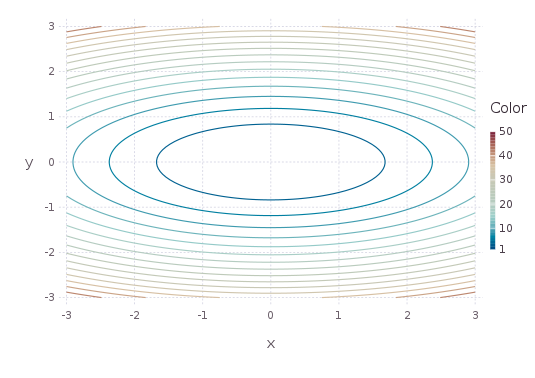

In [2]:
using Gadfly
plot(layer(z=(x,y)->f([x;y]), x=linspace(-3,3,100), y=linspace(-3,3,100),
  Geom.contour))

In [3]:
d = -∇f(x0)

2-element Array{Float64,1}:
  -2.0
 -12.0

In [4]:
t = 1.0
f(x0+t*d), f(x0)+0.5*t*dot(∇f(x0),d)

(442.0,-64.0)

Como $f(x^0+d) > f(x^0)$, então a condição de Armijo não é satisfeito. Vamos atualizar o tamanho do passo sempre multiplicando o passo por 0.9.
Então

In [5]:
t = t*0.9
f(x0+t*d), f(x0)+0.5*t*dot(∇f(x0),d)

(346.6,-56.60000000000001)

O valor já melhorou. Vamos tentar de novo.

In [6]:
t = t*0.9
f(x0+t*d), f(x0)+0.5*t*dot(∇f(x0),d)

(270.6580000000001,-49.940000000000005)

In [7]:
t = t*0.9
f(x0+t*d), f(x0)+0.5*t*dot(∇f(x0),d)

(210.34378000000007,-43.946000000000005)

Como vemos, a ideia é repetir esse diminuição de $t$ até que a condição seja satisfeita. Vamos fazer isso com o while

In [8]:
while f(x0 + t*d) > f(x0) + 0.5*t*dot(∇f(x0),d)
    t = t*0.9;
end
t

0.12157665459056936

In [9]:
x1 = x0 + t*d

2-element Array{Float64,1}:
 0.756847 
 0.0410801

O método se repete agora a partir de x1

In [10]:
d = -∇f(x1);
t = 1.0;
while f(x1 + t*d) > f(x1) + 0.5*t*dot(∇f(x1),d)
    t = t*0.9;
end
x2 = x1 + t*d

2-element Array{Float64,1}:
  0.105251
 -0.100389

In [11]:
d = -∇f(x2);
t = 1.0;
while f(x2 + t*d) > f(x2) + 0.5*t*dot(∇f(x2),d)
    t = t*0.9;
end
x3 = x2 + t*d

2-element Array{Float64,1}:
  0.0796591 
 -0.00274933

Nós precisamos repetir esses passos até que $\Vert\nabla f(x^k)\Vert$ seja suficientemente pequeno. Pra fazer isso, vamos usar apenas uma variável para $x^k$ e atualizá-la.

In [12]:
x = copy(x0); # Cópia de x0
while norm(∇f(x)) > 1e-5
    d = -∇f(x);
    t = 1.0;
    while f(x + t*d) > f(x) + 0.5*t*dot(∇f(x),d)
        t = t*0.9;
    end
    x = x + t*d
end
x

2-element Array{Float64,1}:
 1.32742e-6
 9.36671e-7

Agora sim, temos a solução esperada (suficientemente próximo).

O método então, será esse código. Vamos criar uma função para ele (sempre crie funções)

In [13]:
function gradient_method(f, ∇f, x0) # Precisamos dar um nome e colocar os argumentos de entrada
    x = copy(x0) # Cópia de x0
    while norm(∇f(x)) > 1e-5
        d = -∇f(x)
        t = 1.0
        while f(x + t*d) > f(x) + 0.5*t*dot(∇f(x),d)
            t = t*0.9
        end
        x = x + t*d
    end
    return x # Precisamos retornar o ponto encontrado
end

gradient_method (generic function with 1 method)

Agora podemos brincar com essa função, mudando $f$ e $\nabla f$.

In [14]:
f(x) = (x[1]-1)^2 + 4*(x[2]-2)^2; ∇f(x) = [2*(x[1]-1); 8*(x[2]-2)];
x = gradient_method(f, ∇f, [0.0; 0.0])

2-element Array{Float64,1}:
 0.999997
 2.0     

Inclusive, podemos usar a notação `x->` para definir uma função na hora de chamar a função do método (para testar).

In [15]:
x = gradient_method(x->x[1]^2 + (1-x[2])^2 , x->[2*x[1]; -2*(1-x[2])], [2.0;3.0])

2-element Array{Float64,1}:
 3.08169e-7
 1.0       

Vamos testar também com a famosa função de Rosenbrock

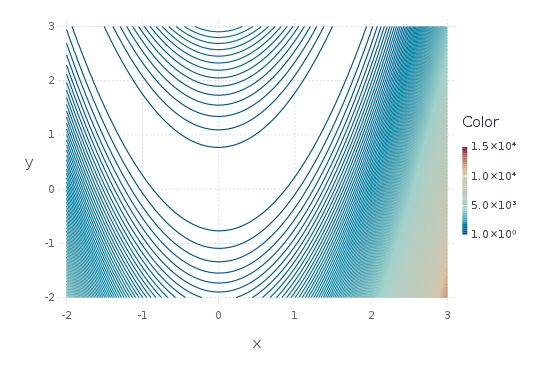

In [16]:
f(x) = (1-x[1])^2 + 100*(x[2]-x[1]^2)^2;
∇f(x) = [-2*(1-x[1]) - 400*x[1]*(x[2]-x[1]^2);
         200*(x[2] - x[1]^2)]; # Posso escrever separado para ficar mais fácil de visualizar
x0 = [1.2; -0.8];
plot(z=(x,y)->f([x;y]), x = linspace(-2,3,100), y = linspace(-2,3,100), Geom.contour(levels=200))

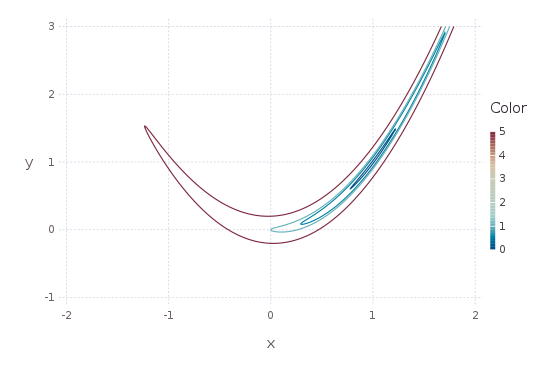

In [17]:
plot(z=(x,y)->f([x;y]), x = linspace(-2,3,1000), y = linspace(-2,3,1000), Geom.contour(levels=[0.05,0.5,1,5]))

In [18]:
x = gradient_method(f, ∇f, x0)

2-element Array{Float64,1}:
 0.999989
 0.999978

Isso conclui o básico do método.

## Mais informações na implementação

Apesar do método estar implementado, queremos mais informações dele.
Queremos saber **quantas iterações** ele leva pra convergir e **em quanto tempo**.
Rapidamente, podemos fazer a parte de iterações.

In [19]:
function gradient_method(f, ∇f, x0) # Precisamos dar um nome e colocar os argumentos de entrada
    x = copy(x0) # Cópia de x0
    iter = 0
    while norm(∇f(x)) > 1e-5
        d = -∇f(x)
        t = 1.0
        while f(x + t*d) > f(x) + 0.5*t*dot(∇f(x),d)
            t = t*0.9
        end
        x = x + t*d
        iter = iter + 1
    end
    return x, iter # Precisamos retornar o ponto encontrado
end

gradient_method (generic function with 1 method)

In [20]:
x, iter = gradient_method(f, ∇f, x0)

([0.999989,0.999978],1816)

Para calcular o tempo temos as funções `tic` e `toc`, similares às funções do MatLab, mas vamos usar a função `time`, que é melhor para fazer comparações (que faremos depois).

In [21]:
function gradient_method(f, ∇f, x0) # Precisamos dar um nome e colocar os argumentos de entrada
    x = copy(x0) # Cópia de x0
    iter = 0
    start_time = time()
    while norm(∇f(x)) > 1e-5
        d = -∇f(x)
        t = 1.0
        while f(x + t*d) > f(x) + 0.5*t*dot(∇f(x),d)
            t = t*0.9
        end
        x = x + t*d
        iter = iter + 1
    end
    elapsed_time = time() - start_time
    return x, iter, elapsed_time # Precisamos retornar o ponto encontrado
end

gradient_method (generic function with 1 method)

In [22]:
x, iter, el_time = gradient_method(f, ∇f, x0)

([0.999989,0.999978],1816,0.10431313514709473)

Além disso, também queremos o valor da função e do gradiente na solução.

In [23]:
function gradient_method(f, ∇f, x0) # Precisamos dar um nome e colocar os argumentos de entrada
    x = copy(x0) # Cópia de x0
    iter = 0
    start_time = time()
    while norm(∇f(x)) > 1e-5
        d = -∇f(x)
        t = 1.0
        while f(x + t*d) > f(x) + 0.5*t*dot(∇f(x),d)
            t = t*0.9
        end
        x = x + t*d
        iter = iter + 1
    end
    elapsed_time = time() - start_time
    return x, f(x), ∇f(x), iter, elapsed_time # Precisamos retornar o ponto encontrado
end

gradient_method (generic function with 1 method)

In [24]:
x, fx, ∇fx, iter, el_time = gradient_method(f, ∇f, x0)

([0.999989,0.999978],1.183961096977204e-10,[-5.92684e-6,-7.91047e-6],1816,0.10191798210144043)

Agora, vamos limitar o número de iterações e o tempo de execução do algoritmo.
Para isso, vamos criar variáveis para essas quantidades. Depois vamos querer receber esses valores na chamada de função. Também vamos criar uma variável para a tolerância.

In [25]:
function gradient_method(f, ∇f, x0) # Precisamos dar um nome e colocar os argumentos de entrada
    tol = 1e-5
    max_iter = 1000
    max_time = 60 # Em segundos
    
    x = copy(x0) # Cópia de x0
    iter = 0
    start_time = time()
    elapsed_time = 0.0
    while norm(∇f(x)) > tol
        d = -∇f(x)
        t = 1.0
        while f(x + t*d) > f(x) + 0.5*t*dot(∇f(x),d)
            t = t*0.9
        end
        x = x + t*d
        iter = iter + 1
        if iter >= max_iter
            break
        end
        elapsed_time = time() - start_time
        if elapsed_time >= max_time
            break
        end
    end
    return x, f(x), ∇f(x), iter, elapsed_time # Precisamos retornar o ponto encontrado
end

gradient_method (generic function with 1 method)

In [26]:
x, fx, ∇fx, iter, el_time = gradient_method(f, ∇f, x0)

([0.999403,0.998804],3.56988505428105e-7,[-0.000127324,-0.000533546],1000,0.02467203140258789)

Note como o método agora não convergiu para esse problema. Da maneira que retornamos o valor do algoritmo, não temos como saber disso. Vamos criar uma variável sinalizando a saída (*exit flag*).
O mais utilizando para o exit flag é que se ele é 0, então ele convergiu. Cada outro valor indica um tipo de problema que aconteceu. Vamos usar 1 para o máximo de iterações e 2 para o máximo de tempo.

In [27]:
function gradient_method(f, ∇f, x0) # Precisamos dar um nome e colocar os argumentos de entrada
    tol = 1e-5
    max_iter = 1000
    max_time = 60 # Em segundos
    exit_flag = 0
    
    x = copy(x0) # Cópia de x0
    iter = 0
    start_time = time()
    elapsed_time = 0.0
    while norm(∇f(x)) > tol
        d = -∇f(x)
        t = 1.0
        while f(x + t*d) > f(x) + 0.5*t*dot(∇f(x),d)
            t = t*0.9
        end
        x = x + t*d
        iter = iter + 1
        if iter >= max_iter
            exit_flag = 1
            break
        end
        elapsed_time = time() - start_time
        if elapsed_time >= max_time
            exit_flag = 2
            break
        end
    end
    return x, f(x), ∇f(x), exit_flag, iter, elapsed_time # Precisamos retornar o ponto encontrado
end

gradient_method (generic function with 1 method)

In [28]:
x, fx, ∇fx, exit_flag, iter, el_time = gradient_method(f, ∇f, x0)
exit_flag

1

Agora vamos colocar os parâmetros `tol`, `max_iter` e `max_time` como parâmetros de entrada da função.
No entanto, algumas coisas têm que ser observadas. Esses parâmetros devem ser **opcionais**, com um **valor padrão**, caso o usuário não queira usá-los.
Em Julia, para criar uma parâmetro opcional, basta colocar o valor padrão na chamada, mas **todos** os argumentos opcionais devem estar à direita.

In [29]:
function media(a, b, p1 = 1.0, p2 = 1.0) # Função que calcula média ponderada.
    return (a*p1 + b*p2)/(p1+p2)
end

media (generic function with 3 methods)

In [30]:
media(3,5) # Chamada assim, os pesos são 1.0 e 1.0

4.0

In [31]:
media(3,5,3.0,2.0) # Pesos 3 e 2

3.8

In [32]:
media(3,5,3.0) # Pesos 3 e 1

3.5

Para calcular a média mudando o peso do segundo parâmetro, é obrigatório passar o peso do primeiro.

No nosso caso, isso é infactível, pois o usuário pode querer mudar apenas um dos parâmetros.
Para resolver esse problema, vamos usar **argumentos de palavra chave** (*keyword argument*).
Esses argumentos devem ser colocados depois de um `;` na chamada de função, e eles devem ser chamados usando o nome do parâmetro.

In [33]:
function media(a, b; p1 = 1.0, p2 = 1.0)
    return (a*p1 + b*p2)/(p1+p2)
end

media (generic function with 3 methods)

In [34]:
media(3,5)

4.0

In [35]:
media(3,5, p1=2)

3.6666666666666665

In [36]:
media(3,5, p2=2)

4.333333333333333

In [37]:
media(3,5, p1=3,p2=2)

3.8

Agora ao nosso caso.

In [38]:
function gradient_method(f, ∇f, x0; tol = 1e-5, max_iter = 1000, max_time = 60)
    exit_flag = 0
    
    x = copy(x0) # Cópia de x0
    iter = 0
    start_time = time()
    elapsed_time = 0.0
    while norm(∇f(x)) > tol
        d = -∇f(x)
        t = 1.0
        while f(x + t*d) > f(x) + 0.5*t*dot(∇f(x),d)
            t = t*0.9
        end
        x = x + t*d
        iter = iter + 1
        if iter >= max_iter
            exit_flag = 1
            break
        end
        elapsed_time = time() - start_time
        if elapsed_time >= max_time
            exit_flag = 2
            break
        end
    end
    return x, f(x), ∇f(x), exit_flag, iter, elapsed_time # Precisamos retornar o ponto encontrado
end

gradient_method (generic function with 1 method)

In [39]:
x, fx, ∇fx, exit_flag, iter, el_time = gradient_method(f, ∇f, x0)

([0.999403,0.998804],3.56988505428105e-7,[-0.000127324,-0.000533546],1,1000,0.026217937469482422)

In [40]:
x, fx, ∇fx, exit_flag, iter, el_time = gradient_method(f, ∇f, x0, max_iter=5000)

([0.999989,0.999978],1.183961096977204e-10,[-5.92684e-6,-7.91047e-6],0,1816,0.1048271656036377)

In [41]:
x, fx, ∇fx, exit_flag, iter, el_time = gradient_method(f, ∇f, x0, tol=1e-3)

([0.998921,0.997839],1.1663518645739358e-6,[-0.000231101,-0.000964391],0,872,0.08279705047607422)

In [42]:
x, fx, ∇fx, exit_flag, iter, el_time = gradient_method(f, ∇f, x0, max_iter=5000, tol=1e-8)

([1.0,1.0],1.1835807667890093e-16,[-5.88718e-9,-7.92844e-9],0,3190,0.14000916481018066)

In [43]:
x, fx, ∇fx, exit_flag, iter, el_time = gradient_method(f, ∇f, x0, max_iter=5000, tol=1e-8, max_time=0.1)

([0.999974,0.999948],6.858141286467863e-10,[-0.000112811,3.02619e-5],2,1639,0.10000896453857422)

Pra finalizar, devemos nos preocupar com a **qualidade** da implementação. Podemos levar isso a vários níveis, mas vamos nos preocupar, por enquanto, apenas com chamadas desnecessária de função.

In [44]:
n = 1000; (Q,R) = qr(rand(n,n));
G = Q*diagm(linspace(1,100,n))*Q'; # Uma matriz nxn com número de condição 100.
g = rand(n);
f(x) = 0.5*dot(x,G*x) + dot(g,x);
∇f(x) = G*x + g;
x, fx, ∇fx, exit_flag, iter, el_time = gradient_method(f, ∇f, zeros(n));
x, fx, ∇fx, exit_flag, iter, el_time = gradient_method(f, ∇f, zeros(n)); # Rodando duas vezes
println("exit_flag = $exit_flag")
println("iter = $iter")
println("el_time = $el_time")

exit_flag = 0
iter = 220
el_time = 6.627942085266113


Em Julia, as coisas são compiladas enquanto vão sendo feitas, então para comparar tempo, temos que rodar a função a primeira vez só para compilá-la.

Nesse exemplo, criamos uma função quadrática
$$ f(x) = \frac{1}{2}x^TGx + x^Tg, $$
onde a matriz $G$ é simétrica definida positiva e com número de condição 100, i.e., bem comportada.
A dimensão de $G$ é 1000, mas o número de iterações que precisamos para convergência é bem menor que 1000.
No entanto, o tempo que o algoritmo leva para convergir é bem maior que no exemplo de Rosenbrock.
Isso acontece porque cada avaliação da função $f$ e de $\nabla f$ tem uma multiplicação por matriz, o que deixa o método mais lento.
Então, precisamos diminuir o número de avaliações. A mudança abaixo, reduz drasticamente a quantidade de avaliações de função que fazemos.

In [45]:
function gradient_method(f, ∇f, x0; tol = 1e-5, max_iter = 1000, max_time = 60)
    exit_flag = 0
    
    x = copy(x0) # Cópia de x0
    iter = 0
    start_time = time()
    elapsed_time = 0.0
    fx = f(x)
    ∇fx = ∇f(x)
    while norm(∇fx) > tol
        d = -∇fx
        ∇fx_dot_d = dot(∇fx, d)
        t = 1.0
        while f(x + t*d) > fx + 0.5*t*∇fx_dot_d
            t = t*0.9
        end
        x = x + t*d
        fx = f(x)
        ∇fx = ∇f(x)
        iter = iter + 1
        if iter >= max_iter
            exit_flag = 1
            break
        end
        elapsed_time = time() - start_time
        if elapsed_time >= max_time
            exit_flag = 2
            break
        end
    end
    return x, fx, ∇fx, exit_flag, iter, elapsed_time # Precisamos retornar o ponto encontrado
end

gradient_method (generic function with 1 method)

In [46]:
x, fx, ∇fx, exit_flag, iter, el_time = gradient_method(f, ∇f, zeros(n));
x, fx, ∇fx, exit_flag, iter, el_time = gradient_method(f, ∇f, zeros(n)); # Rodando duas vezes
println("exit_flag = $exit_flag")
println("iter = $iter")
println("el_time = $el_time")

exit_flag = 0
iter = 220
el_time = 2.3192670345306396


Comparando o tempo das duas, vemos a economia obtida.

Algumas outras melhorias podem ser feitas, mas não vamos nos preocupar com elas agora.